# Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. 



In [4]:
# %pip install tensorflow

In [5]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:
# Load dataset
data = pd.read_csv('Churn_Modelling.csv')

data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Feature and Target separation
X = data.drop(columns=['Exited', 'CustomerId', 'Surname'])
y = data['Exited']

# Encode categorical features
label_encoder = LabelEncoder()
X['Geography'] = label_encoder.fit_transform(X['Geography'])
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Initialize the neural network
model = Sequential()

# Adding the input layer and first hidden layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Adding second hidden layer
model.add(Dense(8, activation='relu'))

# Adding output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/50


C:\Users\lknit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7816 - loss: 0.5183 - val_accuracy: 0.7987 - val_loss: 0.4457
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.4475 - val_accuracy: 0.8000 - val_loss: 0.4275
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8002 - loss: 0.4291 - val_accuracy: 0.8050 - val_loss: 0.4175
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8036 - loss: 0.4233 - val_accuracy: 0.8131 - val_loss: 0.4064
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8105 - loss: 0.4098 - val_accuracy: 0.8206 - val_loss: 0.3952
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8239 - loss: 0.3952 - val_accuracy: 0.8356 - val_loss: 0.3847
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.8362 - loss: 0.3792 - val_accuracy: 0.8462 - val_loss: 0.3768
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8453 - loss: 0.3722 - val_accuracy: 0

Confusion Matrix:
[[1537   70]
 [ 215  178]]


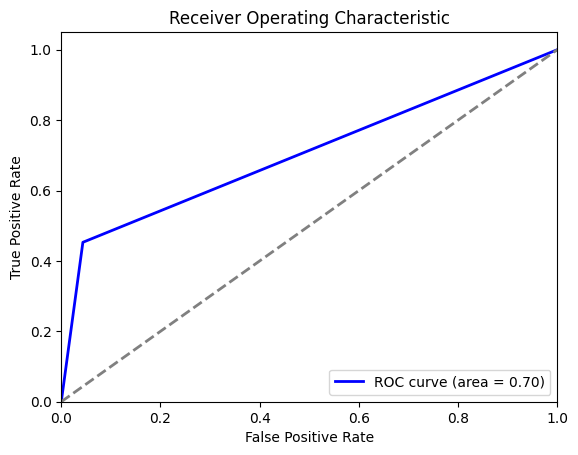

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [10]:
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


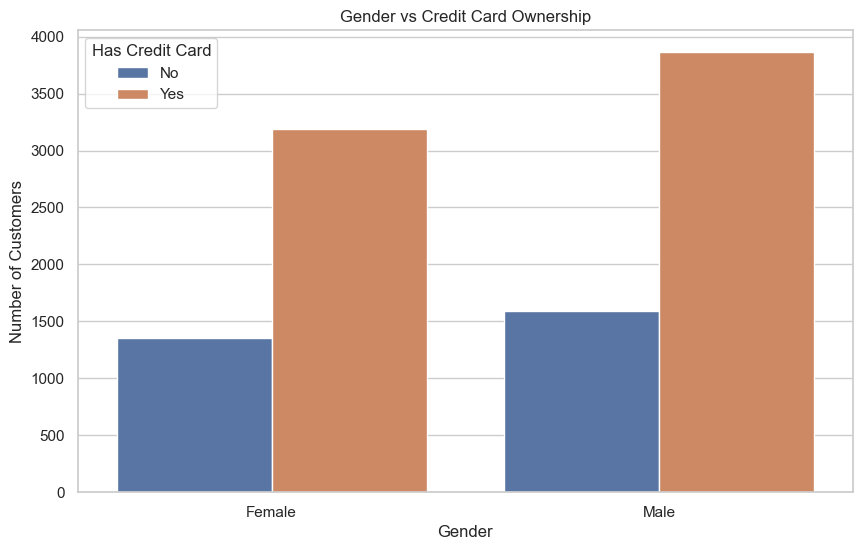

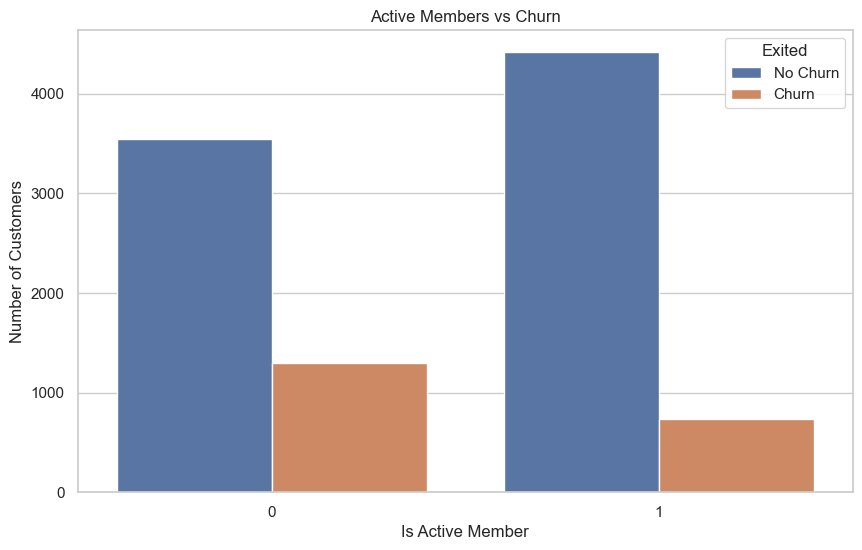

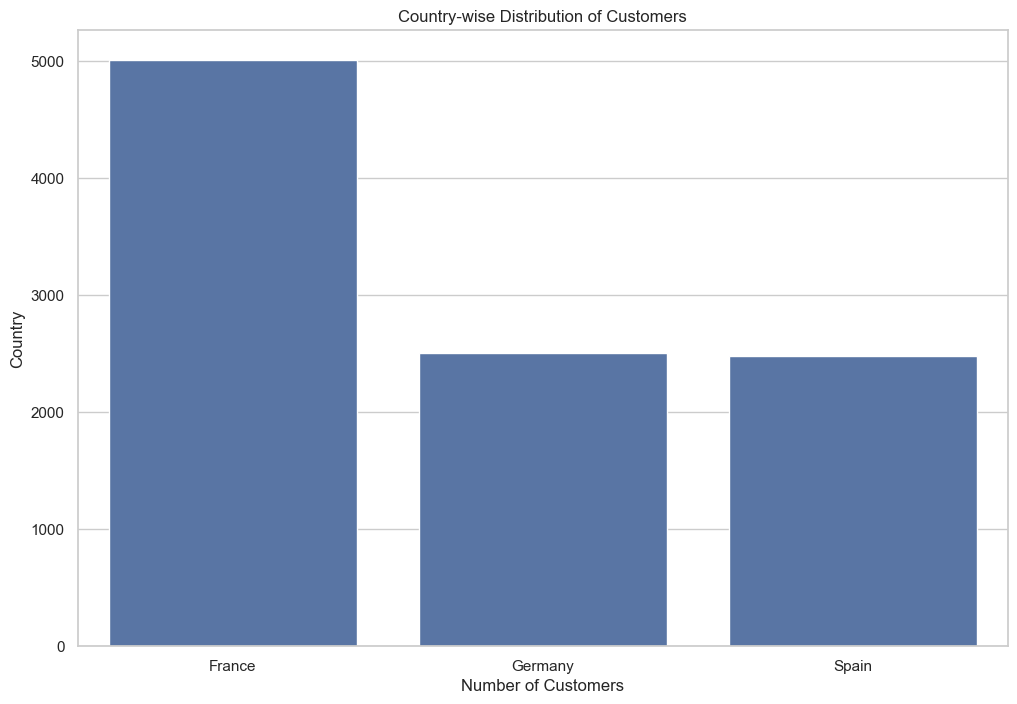

In [11]:
#Visualization


#i) Plot gender vs credit card ownership, active members vs churn, and country-wise distribution

# Check data types and handle missing values
data = data.dropna(subset=['Gender'])  # Ensure no missing values in Gender
data['Gender'] = data['Gender'].astype('category')
data['HasCrCard'] = data['HasCrCard'].replace({0: 'No', 1: 'Yes'}).astype('category')
data['Exited'] = data['Exited'].replace({0: 'No', 1: 'Yes'}).astype('category')


# Set the visual style
sns.set(style="whitegrid")

# 1. Gender vs Credit Card Ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='HasCrCard', data=data)
plt.title('Gender vs Credit Card Ownership')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Has Credit Card', labels=['No', 'Yes'])
plt.show()

# 2. Active Members vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Active Members vs Churn')
plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No Churn', 'Churn'])
plt.show()

# 3. Country-wise Distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Geography', data=data, order=data['Geography'].value_counts().index)
plt.title('Country-wise Distribution of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()


In [12]:
print(data.info())  # This will show data types and any missing values

# Handle missing values in Gender and convert types
data = data.dropna(subset=['Gender'])  # Remove rows with NaN in Gender
data['Gender'] = data['Gender'].astype('category')
data['HasCrCard'] = data['HasCrCard'].astype('category')

# Verify the data before plotting
print(data.head())  # Inspect first few rows
print(data.columns)  # List all columns

# Check dimensions of the data
print(data.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(7), object(2)
memory usage: 889.2+ KB
None
   RowNumber  CustomerId   Surname  CreditScore Geography 

C:\Users\lknit\AppData\Local\Temp\ipykernel_22972\3393967674.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Balance'], shade=True)


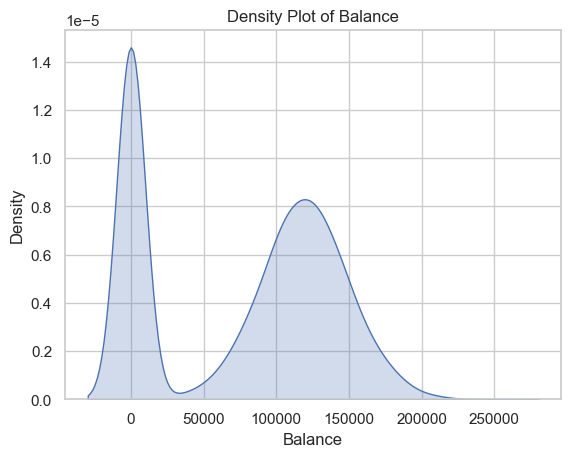

C:\Users\lknit\AppData\Local\Temp\ipykernel_22972\3393967674.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['NumOfProducts'], shade=True)


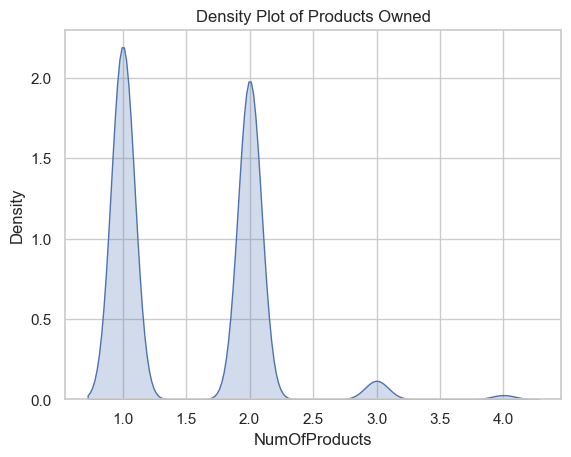

C:\Users\lknit\AppData\Local\Temp\ipykernel_22972\3393967674.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['CreditScore'], shade=True)


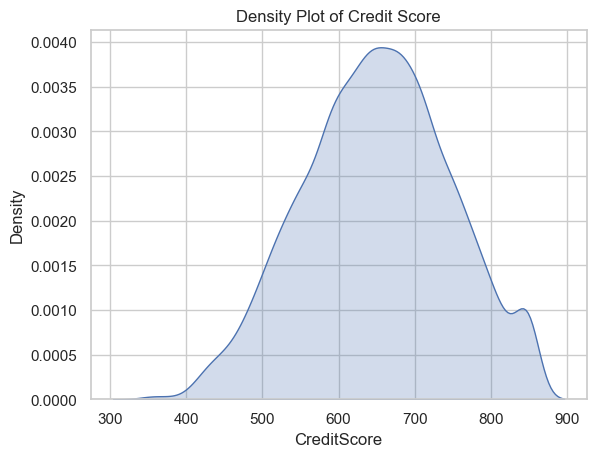

C:\Users\lknit\AppData\Local\Temp\ipykernel_22972\3393967674.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Tenure'], shade=True)


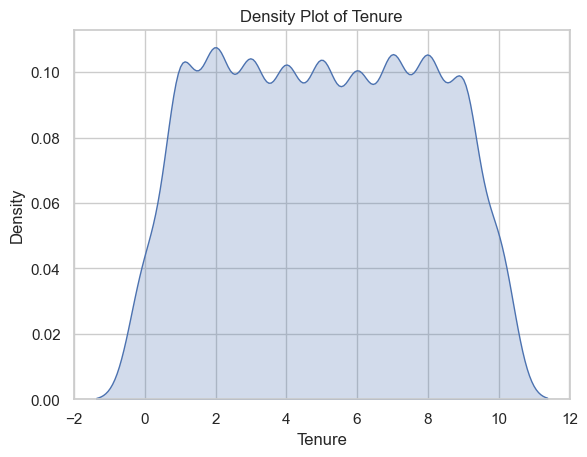

In [13]:
#ii

# Observed Balance Density Plot
sns.kdeplot(data['Balance'], shade=True)
plt.title('Density Plot of Balance')
plt.show()

# Owned Products Density Plot
sns.kdeplot(data['NumOfProducts'], shade=True)
plt.title('Density Plot of Products Owned')
plt.show()

# Credit Score Density Plot
sns.kdeplot(data['CreditScore'], shade=True)
plt.title('Density Plot of Credit Score')
plt.show()

# Tenure Density Plot
sns.kdeplot(data['Tenure'], shade=True)
plt.title('Density Plot of Tenure')
plt.show()


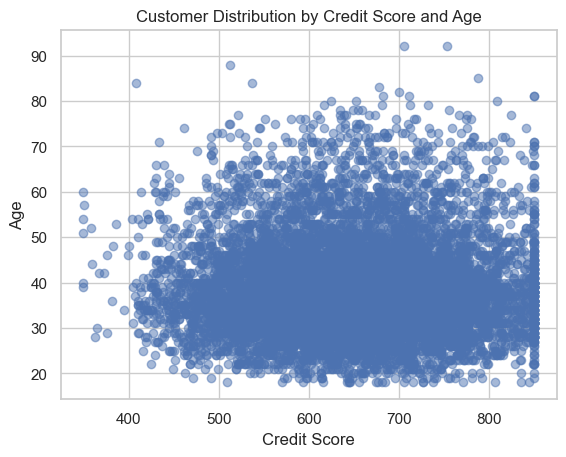

In [14]:
#iii

# Scatter plot of Credit Score vs Age
plt.scatter(data['CreditScore'], data['Age'], alpha=0.5)
plt.title('Customer Distribution by Credit Score and Age')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()


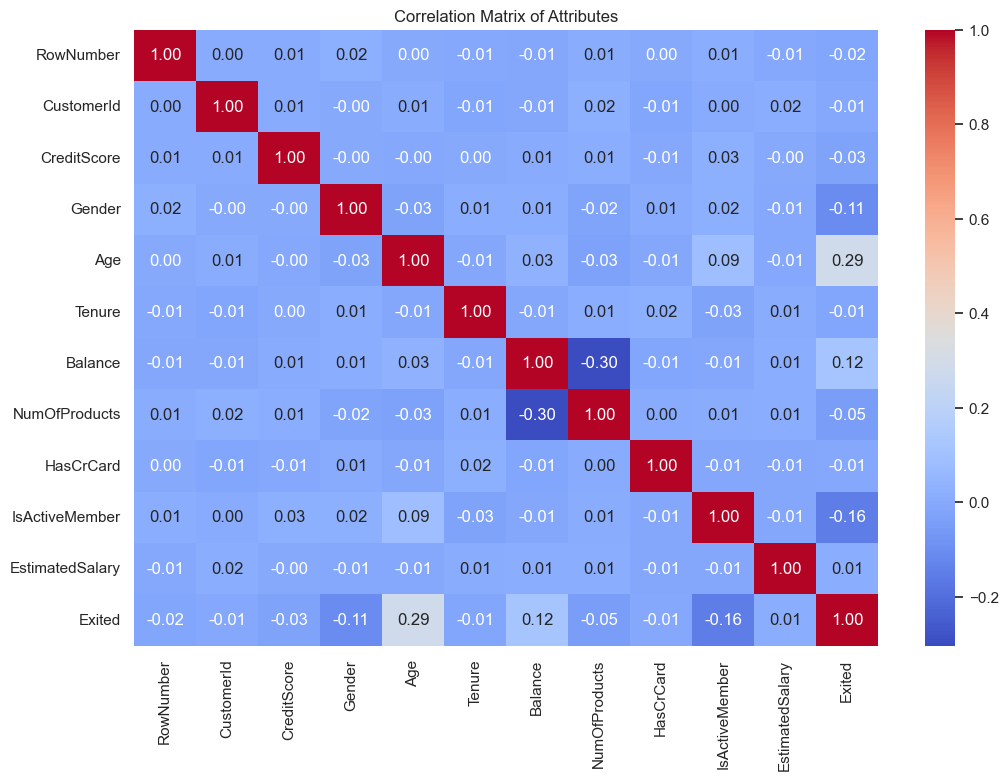

In [15]:
#iv

# Correlation Matrix
# Encode categorical variables to numeric
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Female = 0, Male = 1
data['HasCrCard'] = label_encoder.fit_transform(data['HasCrCard'])  # No = 0, Yes = 1
data['Exited'] = label_encoder.fit_transform(data['Exited'])  # No Churn = 0, Churn = 1

# Calculate correlation matrix


numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Attributes')
plt.show()


In [16]:
## Comparison with Other ML Algorithms


#i Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.864


In [17]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')


KNN Accuracy: 0.8245


In [18]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')


Logistic Regression Accuracy: 0.815


In [19]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')


SVM Accuracy: 0.8035


In [20]:
#xgboost

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')


XGBoost Accuracy: 0.8565


In [21]:
#naive_bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naïve Bayes Accuracy: {accuracy_nb}')


Naïve Bayes Accuracy: 0.83


In [22]:
#Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'LDA Accuracy: {accuracy_lda}')

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f'QDA Accuracy: {accuracy_qda}')


LDA Accuracy: 0.8135
QDA Accuracy: 0.8335


C:\Users\lknit\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                    Accuracy           Confusion Matrix   ROC AUC
Random Forest          0.866   [[1554, 53], [215, 178]]  0.860453
KNN                   0.8245  [[1502, 105], [246, 147]]  0.793947
Logistic Regression    0.815    [[1561, 46], [324, 69]]  0.763427
SVM                    0.857   [[1570, 37], [249, 144]]  0.821354
XGBoost               0.8565   [[1518, 89], [198, 195]]  0.844402
Naive Bayes             0.83    [[1563, 44], [296, 97]]  0.814612
LDA                   0.8135    [[1551, 56], [317, 76]]   0.76701
QDA                   0.8335   [[1556, 51], [282, 111]]  0.814412


C:\Users\lknit\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


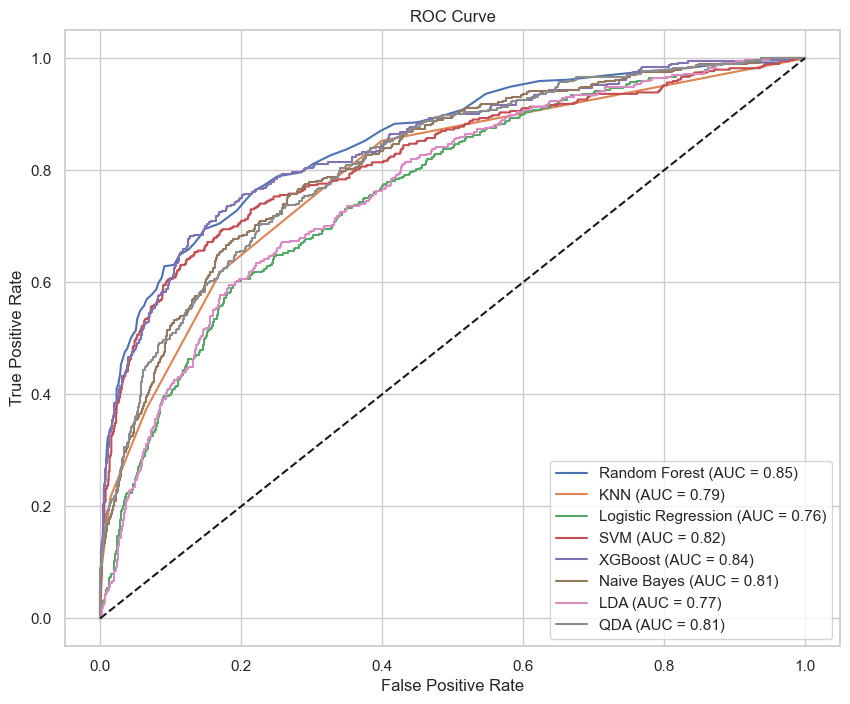

In [24]:
# Define the models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Store performance metrics
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC AUC
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    results[name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "ROC AUC": roc_auc
    }

# Print the results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot ROC Curve for all models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()